# TNT hand gestures study

# flow of program
DELETE BEFORE SUBMISSION

-   code to import data from 3 csv files held in the data folder
-   data is then combined in a dictionary and then converted to a pandas dataframe
-   the data is then cleaned and the columns are renamed
-   the data is then split into a training and testing set
-   a linear regression model is then fitted to the training data
-   the model is then used to predict the test data
-   the mean squared error and r2 score are then calculated
-   the results are then printed to the console

**Dependencies**

In [144]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\samar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\samar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\samar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\samar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\samar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Importing relevant libraries.

In [145]:

#-----------------Information-----------------#

'''
    Title: Linear Regression Model for Predicting Absolute Acceleration
    Data Collection Declaration:

    This project is being developed for a Data Science and Machine Learning class.
    The data used in this project was collected by the student developers at the University of Nottingham. 

    Legal Aspects:

    The data collection process complied with all applicable laws and university policies. 
    Any personal data that was collected has been anonymized to protect the privacy of the individuals involved. 

    Please note that the use of this data must comply with all relevant data protection and privacy laws. 
    Unauthorized use, disclosure, or duplication of this data is strictly prohibited.
'''
'''
    Data Information:

    Data within the dataset being examined is of the format of a csv file with the following columns:
    Column Names and Types:
        'Time (s)': float64
        'Linear Acceleration x (m/s^2)': float64
        'Linear Acceleration y (m/s^2)': float64
        'Linear Acceleration z (m/s^2)': float64
        'Absolute acceleration (m/s^2)': float64
    '''

#-----------------Information-----------------#

#-----------------Importing Libraries-----------------#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#-----------------Importing Libraries-----------------#

In [146]:

#-----------------Flags-----------------#

SYS_MSG = True # Flag to toggle control over printing system messages to console 
PLOT = True # Flag to toggle control over plotting graphs
TEST_PLOT = False # Flag to toggle control over plotting test graphs

#-----------------Flags-----------------#

#-----------------Basic Functions-----------------#

# Function to print system messages
def print_sys_msg(msg):
    if SYS_MSG:
        print('-'*10+'System control message \n'+msg)

# Function to print normal messages
def print_msg(msg):
    print('-'*10+'Message \n'+msg)

#-----------------Basic Functions-----------------#

**Step 1**
We import data from the 3 data files held in the data folder. This data had been collected individually by the 3 members of TNT.
            

\- Samarth

In [147]:
#-----------------DataHandler Class-----------------#
'''
Class DataHandler
    purpose: import and manage data (data manipulation, data wrangling, and data preprocessing)

    functions:
    - import_data: import data from 3 csv files and combine them into a single dataframe
        dependencies used: pandas
        function call example: data = DataHandler('data/member1.csv', 'data/member2.csv', 'data/member3.csv')
        input: 3 csv files (file_1, file_2, file_3)
        output: a dataframe and a dictionary of the data
    
    - data_shape: print the shape of the dataframe
        dependencies used: pandas
        function call example: data.data_shape()
        input: none
        output: none

    - data_head: print the first 5 rows of the dataframe
        dependencies used: pandas
        function call example: data.data_head()
        input: none
        output: none

    - data_info: print the information of the dataframe
        dependencies used: pandas
        function call example: data.data_info()
        input: none
        output: none

    - data_describe: print the description of the dataframe
        dependencies used: pandas
        function call example: data.data_describe()
        input: none
        output: none

    - data_null: print the null values in the dataframe
        dependencies used: pandas
        function call example: data.data_null()
        input: none
        output: none
    
    - data_corr: print the correlation matrix of the dataframe
        dependencies used: pandas
        function call example: data.data_corr()
        input: none
        output: none

    - drop_duplicates: drop duplicates        
        dependencies used: pandas
        function call example: data.drop_duplicates()
        input: none
        output: none

    - drop_null: drop null values     
        dependencies used: pandas
        function call example: data.drop_null()
        input: none
        output: none
    
    - drop_outliers: drop outliers
        dependencies used: pandas
        function call example: data.drop_outliers()
        input: none
        output: none

    - drop_negative_time: drop negative time values
        dependencies used: pandas
        function call example: data.drop_negative_time()
        input: none
        output: none
        
- Managed by: Samarth
- Created on: 03/02/2024
- Modified on: 03/02/2024
- Contact:  psxs2@nottingham.ac.uk
'''
class DataHandler:
    data = None
    df = None

    def __init__(self, file_1, file_2, file_3):
        self.import_data(file_1, file_2, file_3)

    #-----------------Data Import Functions-----------------#
    
    # declaration example - data = DataHandler('data/member1.csv', 'data/member2.csv', 'data/member3.csv')
    def import_data(self, file_1, file_2, file_3):
            print_sys_msg('DataHandler:import_data: importing data from 3 csv files and combining them into a single dataframe')
            data1 = pd.read_csv(file_1)
            data2 = pd.read_csv(file_2)
            data3 = pd.read_csv(file_3)
            self.data = {'member1': data1, 'member2': data2, 'member3': data3}
            self.df = pd.concat(self.data.values(), keys=self.data.keys())

    #-----------------Data Import Functions-----------------#
    #-----------------Basic Data Wrangling Functions-----------------#
    
    def data_shape(self):
        print_sys_msg('DataHandler:data_shape: printing the shape of the dataframe')
        print_sys_msg(str(self.df.shape))
    def data_head(self):
        print_sys_msg('DataHandler:data_head: printing the first 5 rows of the dataframe')
        print_sys_msg(str(self.df.head()))
    
    def data_info(self):
        print_sys_msg('DataHandler:data_info: printing the information of the dataframe')
        print_sys_msg(str(self.df.info()))
                      
    def data_describe(self):
        print_sys_msg('DataHandler:data_describe: printing the description of the dataframe')
        print_sys_msg(str(self.df.describe()))
                      
    def data_null(self):
        print_sys_msg('DataHandler:data_null: printing the null values in the dataframe')
        print_sys_msg(str(self.df.isnull().sum()))
                      
    def data_corr(self):
        print_sys_msg('DataHandler:data_corr: printing the correlation matrix of the dataframe')
        print_sys_msg(str(self.df.corr()))
    
    def data_missing(self):
        print_sys_msg('DataHandler:data_missing: printing the missing values in the dataframe')
        print_sys_msg(str(self.df.isna().any(axis=1)))
    #-----------------Basic Data Wrangling Functions-----------------#
        
    #-----------------Data Preprocessing Functions-----------------#

    def drop_duplicates(self):
        print_sys_msg('DataHandler:drop_duplicates: dropping duplicates')
        self.df = self.df.drop_duplicates()
    
    def drop_null(self):
        print_sys_msg('DataHandler:drop_null: dropping null values')
        self.df = self.df.dropna()


    # def drop_outliers(self):
    #     print_sys_msg('DataHandler:drop_outliers: dropping outliers'
    #     self.df = self.df[(self.df['Linear Acceleration x (m/s^2)'] > -10) & (self.df['Linear Acceleration x (m/s^2)'] < 10)]
    #     self.df = self.df[(self.df['Linear Acceleration y (m/s^2)'] > -10) & (self.df['Linear Acceleration y (m/s^2)'] < 10)]
    #     self.df = self.df[(self.df['Linear Acceleration z (m/s^2)'] > -10) & (self.df['Linear Acceleration z (m/s^2)'] < 10)]
    #     self.df = self.df[(self.df['Absolute acceleration (m/s^2)'] > 0) & (self.df['Absolute acceleration (m/s^2)'] < 10)]

    def drop_negative_time(self):
        print_sys_msg('DataHandler:drop_negative_time: dropping negative time values')
        self.df = self.df[self.df['Time (s)'] > 0]

    # missing values handling - drop rows with missing values
    def drop_missing(self, threshold=3):
        print_sys_msg('DataHandler:drop_missing: dropping missing values')
        self.df = self.df.dropna(thresh=threshold).copy()

    # missing values handling - fill missing values with mean of the column
    def fill_missing(self):
        print_sys_msg('DataHandler:fill_missing: filling missing values with mean of the column')
        self.df = self.df.fillna(self.df.mean())

    # missing values handling - fill missing values with median of the column
    def fill_missing_median(self):
        print_sys_msg('DataHandler:fill_missing_median: filling missing values with median of the column')
        self.df = self.df.fillna(self.df.median())
    
    # missing values handling - fill missing values with mode of the column
    def fill_missing_mode(self):
        print_sys_msg('DataHandler:fill_missing_mode: filling missing values with mode of the column')
        self.df = self.df.fillna(self.df.mode().iloc[0])
    
    # missing values handling - fill missing values with bill debth of the column
    #-----------------------------------
    #-----------------------------------To be written
    #-----------------------------------
    
    # data normalization - min-max normalization
    def min_max_normalization(self):
        print_sys_msg('DataHandler:min_max_normalization: min-max normalization')
        self.df = (self.df - self.df.min()) / (self.df.max() - self.df.min())
    
    # data normalization - standardization
    def standardization(self):
        print_sys_msg('DataHandler:standardization: standardization')
        self.df = (self.df - self.df.mean()) / self.df.std()
    

    #-----------------Data Preprocessing Functions-----------------#


    #-----------------Data Splitting Functions-----------------#
    
    #-----------------Data Splitting Functions-----------------#
        
    #-----------------Storing Data Functions-----------------#

    def store_data_with_name(self, file_name):
        print_sys_msg('DataHandler:store_data: storing data to a csv file')
        self.df.to_csv(file_name, index=False)
    
    def store_data_with_current_date_time(self):
        print_sys_msg('DataHandler:store_data_with_current_date_time: storing data to a csv file with current date and time')
        self.df.to_csv('data_'+str(pd.to_datetime('today'))+'.csv', index=False)
    
    def store_data_with_index(self):
        print_sys_msg('DataHandler:store_data_with_index: storing data to a csv file with index')
        
        # data is stored with index only
        # getting the highest index of the data in the data folder and then incrementing it by 1
        # storing the data with the new index
        #-----------------------------------
        #-----------------------------------To be written

    #-----------------Storing Data Functions-----------------#

#-----------------DataHandler Class-----------------#

In [165]:
#-----------------DataVisualization Class-----------------#
'''
Class DataVisualization

    purpose: visualize data (data visualization)
    
    functions:


'''

class DataVisualization:
    DataHandler = None
    def __init__(self, DataHandler):
        self.DataHandler = DataHandler
    
    #-----------------Base Data Visualization Functions-----------------#

    # declaration example - DataVisualization(DataHandler).create_sub_plots('left_to_right', [['line', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['scatter', 'Time (s)', 'Absolute acceleration (m/s^2)']])
    def create_linear_sub_plots(self, arrangment ,plot_list):
        print_sys_msg('DataVisualization:create_base_plots: creating base plots')
        number_of_plots = len(plot_list)

        if arrangment == 'left_to_right':
            fig, ax = plt.subplots(1, number_of_plots, figsize=(20, 20))
        elif arrangment == 'top_to_bottom':
            fig, ax = plt.subplots(number_of_plots, 1, figsize=(20, 20))  
        else:
            print_sys_msg('DataVisualization:create_base_plots: invalid arrangement type') 
            return    
        
        for i in range(number_of_plots):
            if len(plot_list[i]) >= 3:
                if plot_list[i][0] == 'line':
                    ax[i].plot(self.DataHandler.df[plot_list[i][1]], self.DataHandler.df[plot_list[i][2]])
                elif plot_list[i][0] == 'scatter':
                    ax[i].scatter(self.DataHandler.df[plot_list[i][1]], self.DataHandler.df[plot_list[i][2]])
                elif plot_list[i][0] == 'bar':
                    ax[i].bar(self.DataHandler.df[plot_list[i][1]], self.DataHandler.df[plot_list[i][2]])
                elif plot_list[i][0] == 'hist':
                    ax[i].hist(self.DataHandler.df[plot_list[i][1]], bins=10)
                elif plot_list[i][0] == 'box':
                    ax[i].boxplot(self.DataHandler.df[plot_list[i][1]])
                elif plot_list[i][0] == 'violin':
                    ax[i].violinplot(self.DataHandler.df[plot_list[i][1]])
                else:
                    print_sys_msg('DataVisualization:create_base_plots: invalid plot type')
                
                ax[i].set_xlabel(plot_list[i][1])
                ax[i].set_ylabel(plot_list[i][2])
                ax[i].set_title(plot_list[i][1]+' vs '+plot_list[i][2])
                                                                                
        plt.show()
    
    def create_grid_sub_plots(self, plot_list):
        print_sys_msg('DataVisualization:create_base_plots: creating base plots')
        number_of_plots = len(plot_list)
        fig, ax = plt.subplots(2, 2, figsize=(20, 20))
        for i in range(number_of_plots):
            if len(plot_list[i]) >= 3:
                if plot_list[i][0] == 'line':
                    ax[i//2][i%2].plot(self.DataHandler.df[plot_list[i][1]], self.DataHandler.df[plot_list[i][2]])
                elif plot_list[i][0] == 'scatter':
                    ax[i//2][i%2].scatter(self.DataHandler.df[plot_list[i][1]], self.DataHandler.df[plot_list[i][2]])
                elif plot_list[i][0] == 'bar':
                    ax[i//2][i%2].bar(self.DataHandler.df[plot_list[i][1]], self.DataHandler.df[plot_list[i][2]])
                elif plot_list[i][0] == 'hist':
                    ax[i//2][i%2].hist(self.DataHandler.df[plot_list[i][1]], bins=10)
                elif plot_list[i][0] == 'box':
                    ax[i//2][i%2].boxplot(self.DataHandler.df[plot_list[i][1]])
                elif plot_list[i][0] == 'violin':
                    ax[i//2][i%2].violinplot(self.DataHandler.df[plot_list[i][1]])
                else:
                    print_sys_msg('DataVisualization:create_base_plots: invalid plot type')
                
                ax[i//2][i%2].set_xlabel(plot_list[i][1])
                ax[i//2][i%2].set_ylabel(plot_list[i][2])
                ax[i//2][i%2].set_title(plot_list[i][1]+' vs '+plot_list[i][2])
                                                                                
        plt.show()
    
    #
        
    #-----------------Base Data Visualization Functions-----------------#

----------System control message 
DataHandler:import_data: importing data from 3 csv files and combining them into a single dataframe
----------System control message 
DataHandler:data_shape: printing the shape of the dataframe
----------System control message 
(6459, 5)
----------System control message 
DataHandler:data_head: printing the first 5 rows of the dataframe
----------System control message 
           Time (s)  Linear Acceleration x (m/s^2)  \
member1 0  0.145026                      -0.056557   
        1  0.164969                      -0.008911   
        2  0.184932                       0.071177   
        3  0.204887                      -0.022182   
        4  0.224847                      -0.225723   

           Linear Acceleration y (m/s^2)  Linear Acceleration z (m/s^2)  \
member1 0                      -0.483201                       0.553367   
        1                      -0.354334                       0.438691   
        2                      -0.019857    

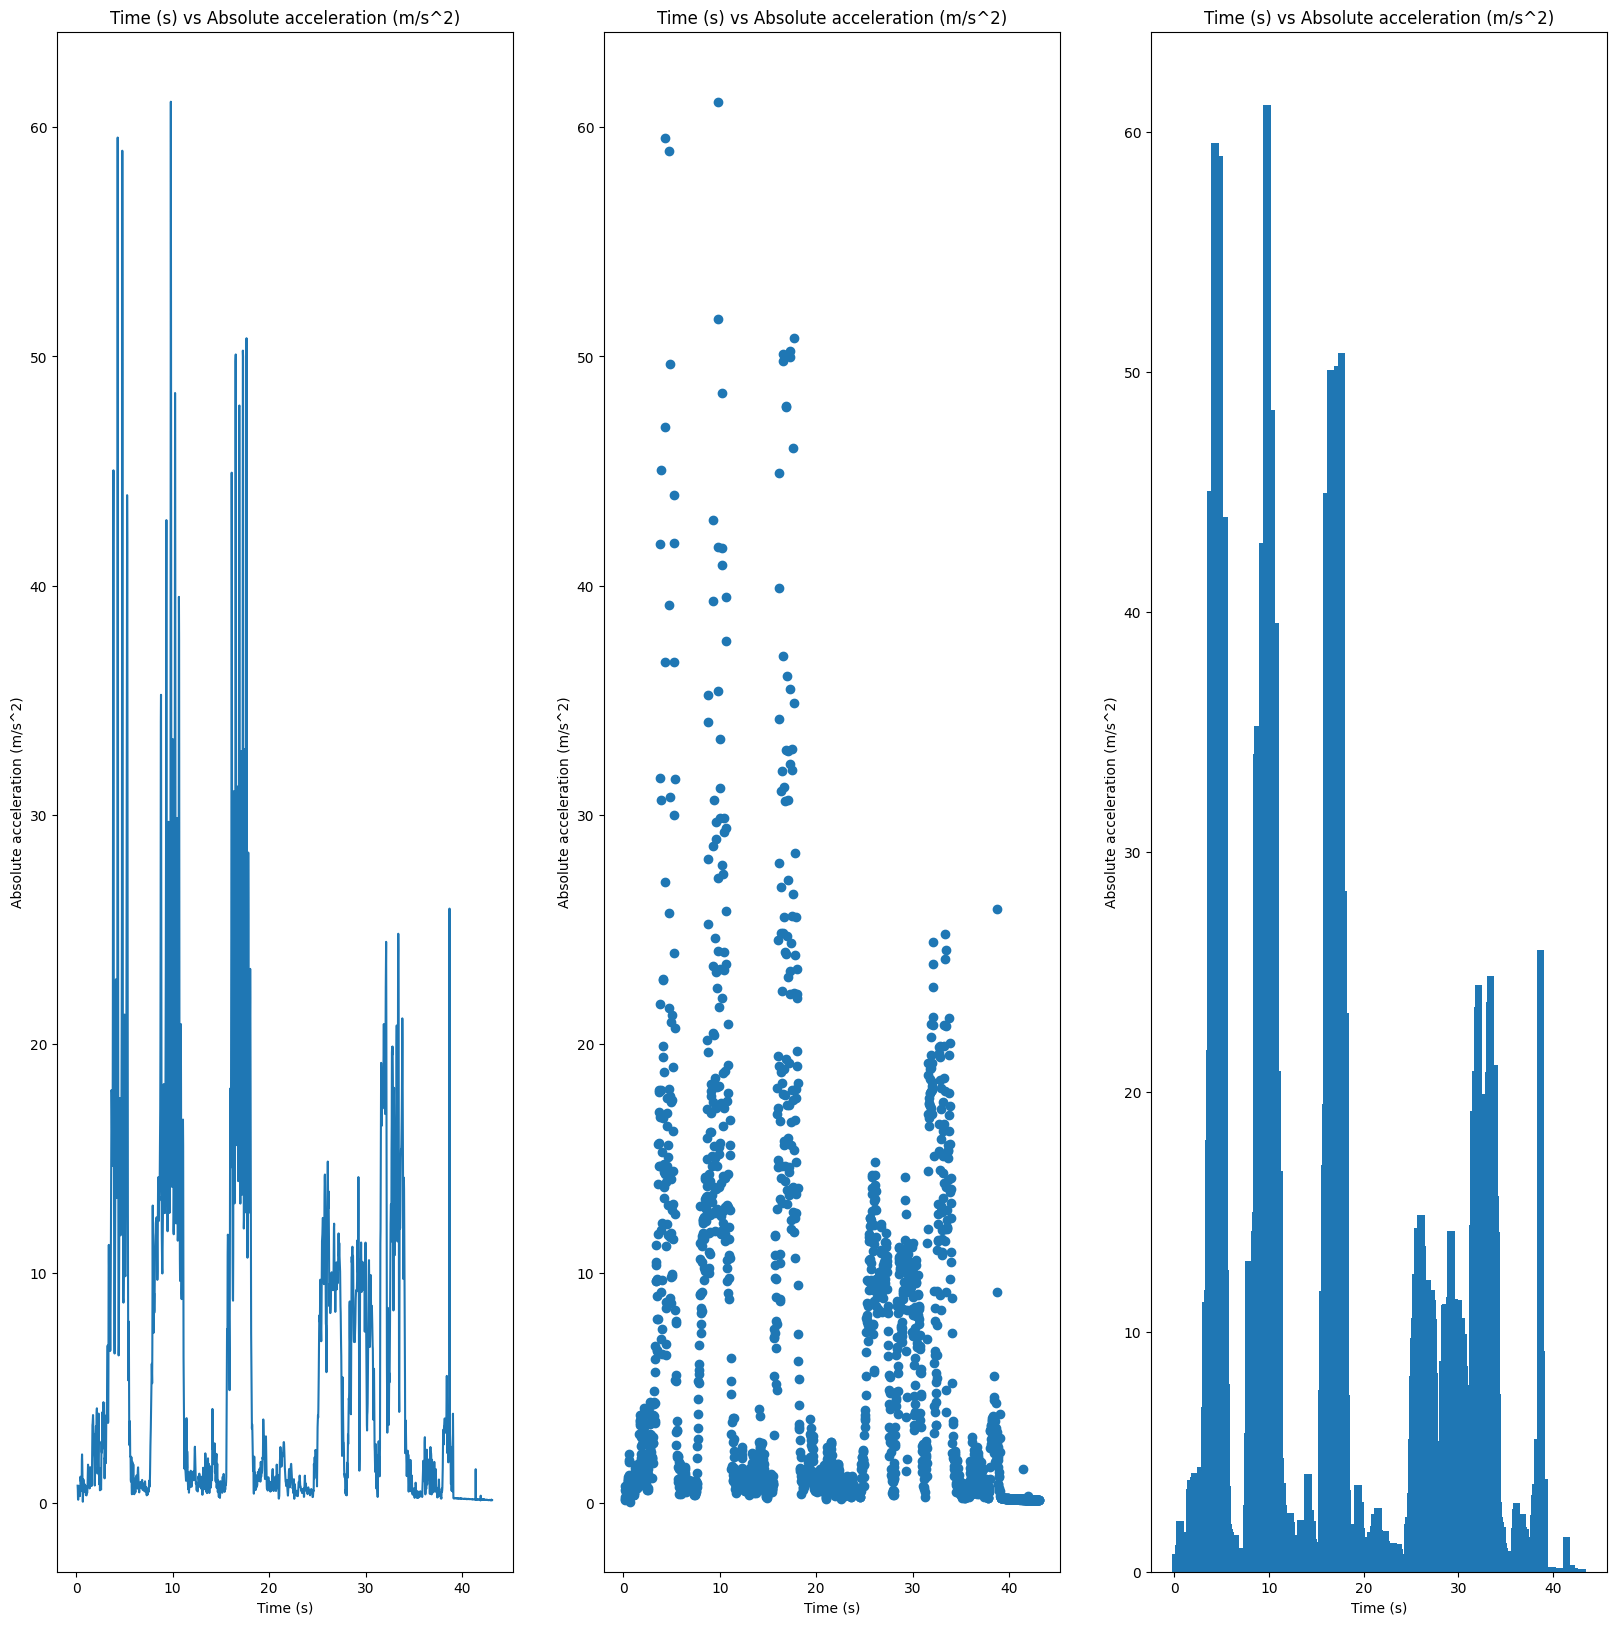

----------System control message 
DataVisualization:create_base_plots: creating base plots


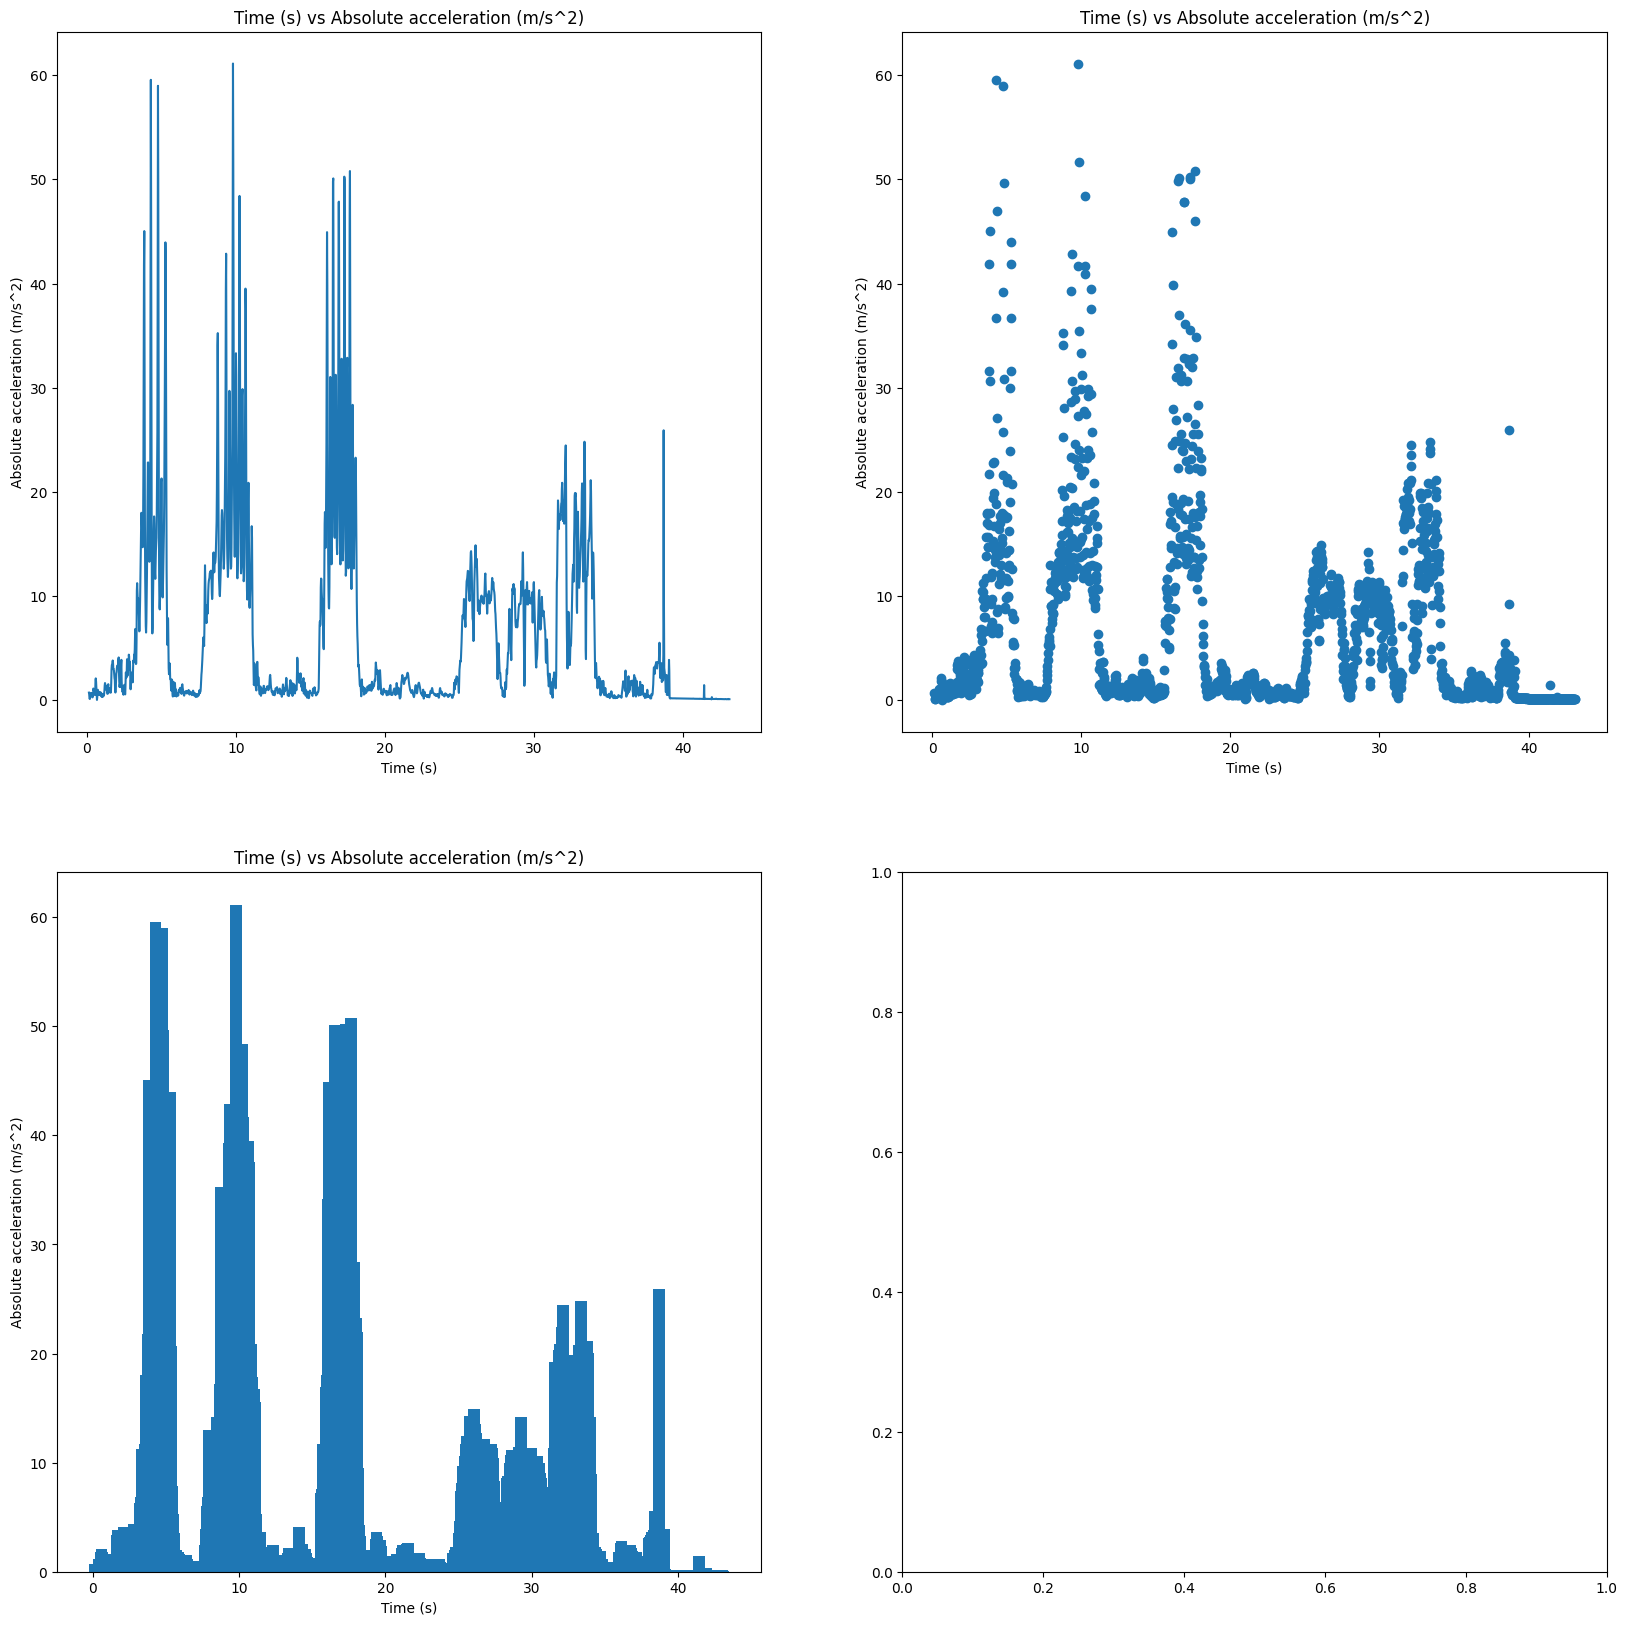

In [169]:
if __name__ == '__main__':

    data = DataHandler('data/rawautodata.csv', 'data/rawautodata1.csv', 'data/rawautodata2.csv')
    
    #-----------------Data Wrangling-----------------#
    # get the shape of the dataframe
    data.data_shape()

    # get the first 5 rows of the dataframe
    data.data_head()

    # get the information of the dataframe
    data.data_info()

    # get the description of the dataframe
    data.data_describe()

    # get the null values in the dataframe
    data.data_null()

    # get the correlation matrix of the dataframe
    data.data_corr()
    #-----------------Data Wrangling-----------------#
    
    #-----------------Data Preprocessing-----------------#
    # drop duplicates
    data.drop_duplicates()

    # drop null values
    dv = DataVisualization(data)
    dv.create_linear_sub_plots('left_to_right',[['line', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['scatter', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['bar', 'Time (s)', 'Absolute acceleration (m/s^2)']])
    dv.create_grid_sub_plots([['line', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['scatter', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['bar', 'Time (s)', 'Absolute acceleration (m/s^2)']])
    #-----------------Data Visualization-----------------#
